In [1]:
import sys
sys.path.append('../src')

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from structure_learning.data import SyntheticDataset, Data
from structure_learning.distributions import Distribution
from structure_learning.experiments import Experiment
from structure_learning.evaluation.metrics import RHat
from structure_learning.approximators import StructureMCMC
from structure_learning.inference import CausalEffects
# for reproducibility
np.random.seed(1000)

### Generate data

In [3]:
# setup synthetic data
num_nodes = 5
node_labels = [chr(ord('a') + i) for i in range(num_nodes)]
num_obs = 200
degree = 2

synthetic_data = SyntheticDataset(num_nodes=num_nodes, num_obs=num_obs, node_labels=node_labels, degree=degree)

00000 00000 00000 11101 00100


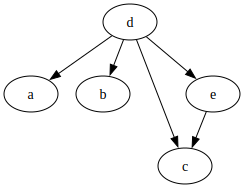

In [4]:
synthetic_data.graph.plot()

### Run MCMC

In [5]:

M = StructureMCMC(data=synthetic_data.data, score_object='bge', max_iter=100, pc_init=False, result_type='distribution')
results, acceptance = M.run()

MCMC iterations: 101iter [00:00, 5200.34iter/s]           


### Causal Effects

In [6]:
ce = CausalEffects(graphs=results, data=synthetic_data.data)

### BEEPS

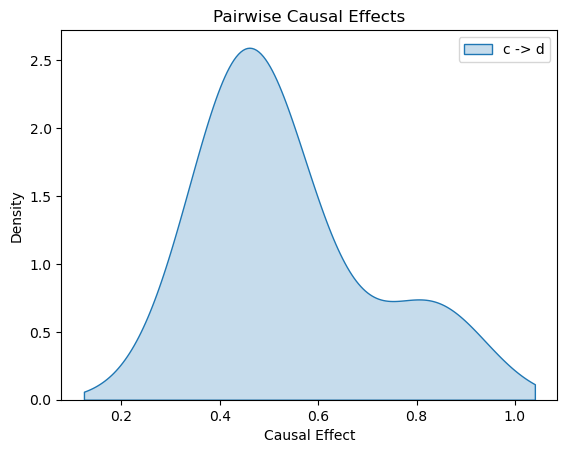

In [7]:
effects, weights = ce.beeps(plot=True, edges=[('c','d')])

### do-calculus

(array([[[ 1.        , -0.2061416 , -0.06369215, -0.32805624,
          -0.08658642],
         [ 0.        ,  0.        ,  0.        ,  0.        ,
           0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,
           0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,
           0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,
           0.        ]],
 
        [[ 1.        , -0.2801374 , -0.00917947, -0.3327781 ,
           0.2398844 ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,
           0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,
           0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,
           0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,
           0.        ]],
 
        [[ 1.        , -0.22568021, -0.05191271, -0.35853566,
          -0.13556304],
         [ 0.        ,  0.        ,  0.        ,

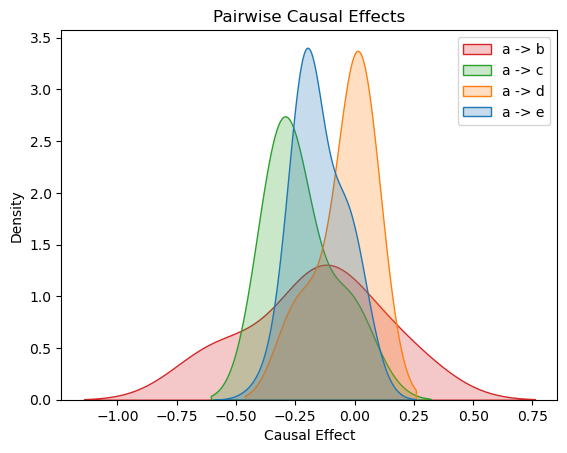

In [8]:
ce.simulate(intervention=['a'], do_value=1.0, multiply = False, plot=True)